# Gaus Filter

In [1]:
using FFTW

function gauss_filter_freq(t, y, B)
    # original signal
    ts = 0.01
    F = fft(y) |> fftshift
    f = fftfreq(length(t), 1.0/ts) |> fftshift
    p = plot(f, abs.(F), label="Original Signal", linewidth=2)
    # low pass filter
    filter = exp.(-f.*f/(2*B*B))
    F = F.*filter
    p = plot!(p, f, abs.(F), label="Low Pass Filter", linewidth=2,
              xlabel="f (Hz)", ylabel="Amplitude", title="gauss_filter_freq")
    display(p)
    f, F
end 

gauss_filter_freq (generic function with 1 method)

# Test

## Synthetic signal

A $\sin()$ function is create with frequency $2$, and additive noise with $0.2$ standard deviation.

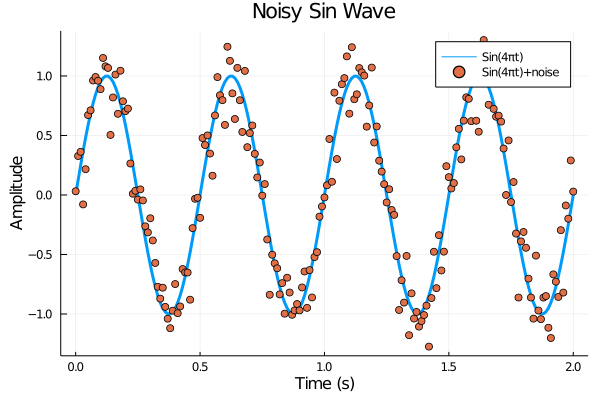

In [2]:
using Plots
# create a sin() signal
ts = 0.01
t = collect(0:ts:2)
x = sin.(4*pi*t)
y = x+randn(size(t))/5
# show something
plot(t, x, title="Noisy Sin Wave", ylabel="Amplitude",
    linewidth=3, label="Sin(4πt)", xlabel="Time (s)")
plot!(t, y, label="Sin(4πt)+noise", seriestype=:scatter)

## Frequncy domain filtering

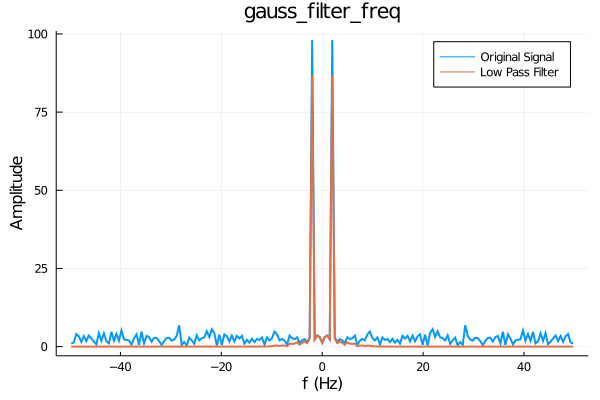

(-49.75124378109453:0.4975124378109453:49.75124378109453, Complex{Float64}[1.7726088697345298e-34 + 1.7449247101007607e-34im, 7.309368701099106e-34 + 1.3716084386047725e-33im, 1.9513812267053896e-32 - 1.0174906868654876e-32im, 8.970320393578927e-33 + 8.124547866130126e-32im, -1.5337406683153676e-31 + 6.184540805994258e-32im, 6.7100199354709905e-31 + 1.4731944673688243e-30im, 3.320324897952486e-30 - 1.5541387777462695e-30im, -1.52617493479108e-29 + 2.718153946130445e-29im, 8.036102705338972e-29 - 5.155661567905813e-29im, 1.154651119307481e-28 + 2.0571927930364476e-28im  …  1.1546511193074758e-28 - 2.05719279303645e-28im, 8.036102705338975e-29 + 5.155661567905813e-29im, -1.5261749347910782e-29 - 2.7181539461304444e-29im, 3.320324897952481e-30 + 1.5541387777462763e-30im, 6.710019935471004e-31 - 1.4731944673688234e-30im, -1.5337406683153645e-31 - 6.184540805994262e-32im, 8.970320393578951e-33 - 8.124547866130128e-32im, 1.9513812267053962e-32 + 1.0174906868654889e-32im, 7.3093687010990505e-

In [3]:
f,F = gauss_filter_freq(t, y, 4)

## Comparison with original signal

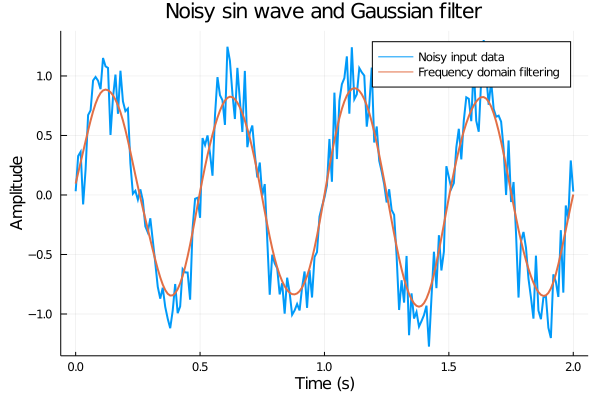

In [4]:
plot(t,y, linewidth=2, label="Noisy input data")
plot!(t,real.(ifft(ifftshift(F))), linewidth=2, label="Frequency domain filtering",
        title="Noisy sin wave and Gaussian filter", xlabel="Time (s)", ylabel="Amplitude")

## Adjourn

In [5]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/February/4 12:09"